In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [2]:
!nvidia-smi

Mon Jul 24 10:31:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!python --version

Python 3.7.12


In [4]:
%cd /kaggle/working

/kaggle/working


In [5]:
# !pip install torch==1.7.0 torchvision==0.8.0
!pip install torch==1.12.0 torchvision==0.13.0 torchaudio==0.12.0

     |████████████████████████████████| 776.3 MB 13 kB/s              
     |████████████████████████████████| 19.1 MB 54.6 MB/s            
     |████████████████████████████████| 3.7 MB 53.9 MB/s            
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1
    Uninstalling torch-1.9.1:
      Successfully uninstalled torch-1.9.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.1
    Uninstalling torchvision-0.10.1:
      Successfully uninstalled torchvision-0.10.1
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.9.1
    Uninstalling torchaudio-0.9.1:
      Successfully uninstalled torchaudio-0.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.5.3 requires torch<1.11,>=1.7.0, but you have torch 1.12.0 which is incompatible.
allennlp 2.9.1 requires torch<1.1

In [6]:
!pip install -U openmim
# Install mmengine
!mim install mmengine
# Install MMCV
!mim install 'mmcv >= 2.0.0rc1'

     |████████████████████████████████| 52 kB 816 kB/s             
     |████████████████████████████████| 2.1 MB 15.8 MB/s            
/opt/conda/lib/python3.7/site-packages/setuptools/command/install.py:37: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  setuptools.SetuptoolsDeprecationWarning,
Looking in links: https://download.openmmlab.com/mmcv/dist/cu102/torch1.12.0/index.html
     |████████████████████████████████| 433 kB 7.4 MB/s            
     |████████████████████████████████| 250 kB 55.3 MB/s            
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
/opt/conda/lib/python3.7/site-packages/setuptools/command/install.py:37: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  setuptools.SetuptoolsDepr

In [7]:
# !pip install mmcv==2.0.0rc4 -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.7/index.html

# **RESTART KERNEL BEFORE GOING FURTHER**

In [8]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
print(torchvision.__version__)

1.12.0+cu102 True
0.13.0+cu102


In [9]:
!rm -r mmsegmentation
!git clone https://github.com/alirafiqmalik/mmsegmentation.git 
%cd mmsegmentation
# !pip install -v -e .
!python setup.py build
!pip install .
%cd ..

rm: cannot remove 'mmsegmentation': No such file or directory
Cloning into 'mmsegmentation'...
remote: Enumerating objects: 1530, done.
remote: Counting objects: 100% (1530/1530), done.
remote: Compressing objects: 100% (765/765), done.
remote: Total 1530 (delta 771), reused 1502 (delta 743), pack-reused 0
Receiving objects: 100% (1530/1530), 5.36 MiB | 24.96 MiB/s, done.
Resolving deltas: 100% (771/771), done.
/kaggle/working/mmsegmentation
running build
running build_py
creating build
creating build/lib
creating build/lib/tests
copying tests/__init__.py -> build/lib/tests
copying tests/test_config.py -> build/lib/tests
copying tests/test_sampler.py -> build/lib/tests
copying tests/test_digit_version.py -> build/lib/tests
creating build/lib/mmseg
copying mmseg/version.py -> build/lib/mmseg
copying mmseg/__init__.py -> build/lib/mmseg
creating build/lib/tests/test_models
copying tests/test_models/__init__.py -> build/lib/tests/test_models
copying tests/test_models/test_forward.py -> bu

In [10]:
# Check MMSegmentation installation
import mmseg,mmcv,mmengine
print(mmseg.__version__,mmcv.__version__,mmengine.__version__)

1.0.0 2.0.1 0.8.2


# **DATASET LOADING**

In [11]:
# Let's take a look at the dataset
import mmcv
import mmengine
import matplotlib.pyplot as plt
import os

In [12]:
# define dataset root and directory for images and annotations
data_root = '/kaggle/input/floodnet-mydata-output12gb/content/drive/MyDrive/Thesis_Code_msee/FloodNet_myData'
img_dir = 'images'
ann_dir = 'annotations'

In [13]:
import pandas as pd
# define class and palette for better visualization
df=pd.read_csv('/kaggle/input/floodnet-mydata-output12gb/content/drive/MyDrive/Thesis_Code_msee/FloodNet_myData/Now_class_dict_seg_10clss.csv')
classes = df['name']
palette = df[[' r', ' g', ' b']].values
id2label = classes.to_dict()
label2id = {v: k for k, v in id2label.items()}
print("classes", len(id2label))
print(classes)
print(palette)
classes=list(classes)
palette=list(palette)
num_classes=len(id2label)

classes 10
0         Background
1    BuildingFlooded
2        BNonFlooded
3        RoadFlooded
4        RNonFlooded
5              Water
6               Tree
7             Vecile
8               Pool
9              Grass
Name: name, dtype: object
[[  0   0   0]
 [255   0   0]
 [181  72  72]
 [150 150   0]
 [135 135 135]
 [  0 224 224]
 [  0   0 225]
 [204   0 204]
 [237 237   0]
 [  0 225   0]]


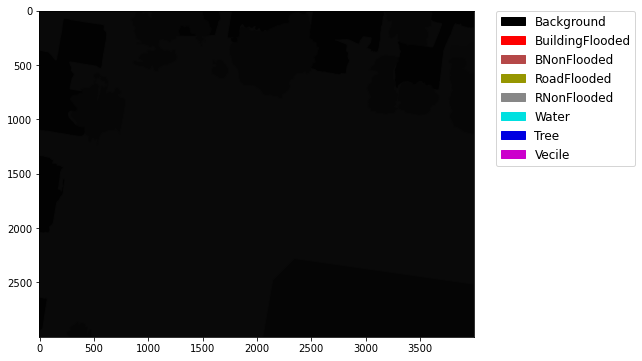

In [14]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
from PIL import Image
import numpy as np
img = Image.open('/kaggle/input/floodnet-mydata-output12gb/content/drive/MyDrive/Thesis_Code_msee/FloodNet_myData/annotations/training/6464_lab.png')

plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [15]:
classes

['Background',
 'BuildingFlooded',
 'BNonFlooded',
 'RoadFlooded',
 'RNonFlooded',
 'Water',
 'Tree',
 'Vecile',
 'Pool',
 'Grass']

In [16]:
palette

[array([0, 0, 0]),
 array([255,   0,   0]),
 array([181,  72,  72]),
 array([150, 150,   0]),
 array([135, 135, 135]),
 array([  0, 224, 224]),
 array([  0,   0, 225]),
 array([204,   0, 204]),
 array([237, 237,   0]),
 array([  0, 225,   0])]

In [17]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

## should be run only once

@DATASETS.register_module()
class ImageSegmentationDataset(BaseSegDataset):
    METAINFO = dict(classes = classes, palette = palette)
    def __init__(self, **kwargs):
        super().__init__(img_suffix='.jpg', seg_map_suffix="_lab.png", **kwargs)


%cd /kaggle/working
!rm -r checkpoint
!mkdir checkpoint

/kaggle/working
rm: cannot remove 'checkpoint': No such file or directory


# Training

In [18]:
from mmengine import Config
cfg = Config.fromfile('/kaggle/working/mmsegmentation/configs/swin/swin-base-patch4-window12-in1k-384x384-pre_upernet_8xb2-160k_ade20k-512x512.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='SyncBN', requires_grad=True)
backbone_norm_cfg = dict(type='LN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    std=[
        58.395,
        57.12,
        57.375,
    ],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        512,
    ))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[
            123.675,
            116.28,
            103.53,
        ],
        std=[
            58.395,
            57.12,
            57.375,
        ],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(
            512,
            512,
        )),
    pretrained=None,
    backbone=dict(
        type='SwinTransformer',
        pretrain_img_size=384,
        embed_dims=128,
        patch_size=4,
        window_size=12,
        mlp_rati

In [19]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)

# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 150
cfg.model.auxiliary_head.num_classes = 10



cfg.val_evaluator = dict(type='IoUMetric',
                         iou_metrics=['mIoU', 'mDice', 'mFscore'],
#                          format_only=True,
#                          output_dir='/kaggle/working/results'
                        )
cfg.test_evaluator = cfg.val_evaluator

# # Modify dataset type and path
cfg.dataset_type = 'ImageSegmentationDataset'
cfg.data_root = data_root


cfg.train_dataloader.dataset.type=cfg.dataset_type
cfg.val_dataloader.dataset.type=cfg.dataset_type
cfg.test_dataloader.dataset.type=cfg.dataset_type

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(512, 512), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations', reduce_zero_label=False),
    dict(type='PackSegInputs')
]

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', reduce_zero_label=False),
    dict(
        type='RandomResize',
        scale=(
            512,
            512,
        ),
        ratio_range=(
            0.5,
            2.0,
        ),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(
        512,
        512,
    ), cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='PackSegInputs'),
]

cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline

cfg.test_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline


cfg.train_dataloader.dataset.data_root =data_root 
cfg.val_dataloader.dataset.data_root =data_root 
cfg.test_dataloader.dataset.data_root=data_root

cfg.train_dataloader.num_workers=1
cfg.train_dataloader.batch_size = 2
cfg.train_dataloader.persistent_workers=False


cfg.val_dataloader.batch_size = 1
cfg.val_dataloader.num_workers=1
cfg.val_dataloader.persistent_workers=False

cfg.test_dataloader.batch_size = 1
cfg.test_dataloader.num_workers=1
cfg.test_dataloader.persistent_workers=False

cfg.work_dir = './checkpoint'

cfg.train_cfg.max_iters = 10000
cfg.train_cfg.val_interval = 20000
cfg.default_hooks.logger.interval =100
cfg.default_hooks.checkpoint.interval = 1000

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

# Let's have a look at the final config used for training
# print(f'Config:\n{cfg.pretty_text}')

In [20]:
cfg.dump('/kaggle/working/my_config_file.py')

In [21]:
from mmengine.runner import Runner
runner = Runner.from_cfg(cfg)

07/24 10:34:29 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla P100-PCIE-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.0, V11.0.221
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.12.0+cu102
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.2
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arc

/opt/conda/lib/python3.7/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/opt/conda/lib/python3.7/site-packages/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


07/24 10:34:37 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
07/24 10:34:37 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/opt/conda/lib/python3.7/site-packages/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [22]:
# start training
runner.train()

/opt/conda/lib/python3.7/site-packages/mmseg/datasets/transforms/loading.py:78: UserWarning: `reduce_zero_label` will be deprecated, if you would like to ignore the zero label, please set `reduce_zero_label=True` when dataset initialized
  warnings.warn('`reduce_zero_label` will be deprecated, '


07/24 10:34:41 - mmengine - INFO - paramwise_options -- backbone.patch_embed.norm.weight:lr=6e-05
07/24 10:34:41 - mmengine - INFO - paramwise_options -- backbone.patch_embed.norm.weight:weight_decay=0.0
07/24 10:34:41 - mmengine - INFO - paramwise_options -- backbone.patch_embed.norm.weight:decay_mult=0.0
07/24 10:34:41 - mmengine - INFO - paramwise_options -- backbone.patch_embed.norm.bias:lr=6e-05
07/24 10:34:41 - mmengine - INFO - paramwise_options -- backbone.patch_embed.norm.bias:weight_decay=0.0
07/24 10:34:41 - mmengine - INFO - paramwise_options -- backbone.patch_embed.norm.bias:decay_mult=0.0
07/24 10:34:41 - mmengine - INFO - paramwise_options -- backbone.stages.0.blocks.0.norm1.weight:lr=6e-05
07/24 10:34:41 - mmengine - INFO - paramwise_options -- backbone.stages.0.blocks.0.norm1.weight:weight_decay=0.0
07/24 10:34:41 - mmengine - INFO - paramwise_options -- backbone.stages.0.blocks.0.norm1.weight:decay_mult=0.0
07/24 10:34:41 - mmengine - INFO - paramwise_options -- backb

Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/swin/swin_base_patch4_window12_384_20220317-55b0104a.pth" to /root/.cache/torch/hub/checkpoints/swin_base_patch4_window12_384_20220317-55b0104a.pth


07/24 10:35:22 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
07/24 10:35:22 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
07/24 10:35:22 - mmengine - INFO - Checkpoints will be saved to /kaggle/working/checkpoint.
07/24 10:36:54 - mmengine - INFO - Iter(train) [  100/10000]  base_lr: 3.9627e-06 lr: 3.9627e-06  eta: 2:31:43  time: 0.8952  data_time: 0.2443  memory: 11889  loss: 4.2534  decode.loss_ce: 3.5734  decode.acc_seg: 5.3015  aux.loss_ce: 0.6800  aux.acc_seg: 13.5463
07/24 10:38:23 - mmengine - INFO - Iter(train) [  200/10000]  base_lr: 7.9654e-06 lr: 7.9654e-06  eta: 2:27:43  time: 0.8688  data_time: 0.2223  memory: 6766  loss: 3.8759  decode.loss_ce: 3.2034  decode.acc_seg: 31.7059  aux.loss_ce: 0.6725  aux.acc_seg: 24.8714
07/24 10:39:52 - mmengine - INFO - Iter(train) [  300/10000]  base_lr: 1.1

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): SwinTransformer(
    (patch_embed): PatchEmbed(
      (adap_padding): AdaptivePadding()
      (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (drop_after_pos): Dropout(p=0.0, inplace=False)
    (stages): ModuleList(
      (0): SwinBlockSequence(
        (blocks): ModuleList(
          (0): SwinBlock(
            (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (attn): ShiftWindowMSA(
              (w_msa): WindowMSA(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop): DropPath()
            )
       